# Infraestrutura e Dependências 

## * Verificando se o tensorflow encontra a GPU local

In [1]:
import tensorflow as tf

# List available GPUs

gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)

# Allocate GPU memory dynamically
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


2023-09-19 23:13:16.236666: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-09-19 23:13:17.548685: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 23:13:17.551900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 23:13:17.552009: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## * Verificando as propriedades da GPU local

In [2]:
!nvidia-smi


Tue Sep 19 23:13:18 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650         On | 00000000:01:00.0 Off |                  N/A |
| N/A   50C    P3               11W /  50W|   1106MiB /  4096MiB |     25%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## * Verificando se as bilbiotecas foram instaladas corretamente, junto do tensorflow

In [3]:
!pip list

Package                      Version
---------------------------- --------------------
absl-py                      1.4.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
backcall                     0.2.0
beautifulsoup4               4.12.0
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2019.11.28
cffi                         1.15.1
chardet                      3.0.4
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
dbus-python                  1.2.16
debugpy                      1.6.6
decorator                    5.1.1
defusedxml                   0.7.1
executing                    1.2.0
fastjsonschema               2.16.3
flatbuffers                  23.3.3
fonttools               

# Análise e processamento dos dados T1

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import math

In [5]:
CURRENT = os.getcwd()
ROOT = os.path.join("/project")
DATASETS = os.path.join(ROOT, "datasets")
DATASETS_EXTRACTED = os.path.join(DATASETS, "extracted")
T1_PATH = os.path.join(DATASETS_EXTRACTED, "T1.csv")
STIR_PATH = os.path.join(DATASETS_EXTRACTED, "STIR.csv")

In [6]:
T1 = pd.read_csv(T1_PATH) \
      .sort_values(by="case_PatientID", ignore_index=True)

In [7]:
STIR = pd.read_csv(STIR_PATH) \
      .sort_values(by="case_PatientID", ignore_index=True)

In [8]:
print(STIR.shape)
STIR.head()

(25, 1039)


,case_PatientID,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,...,STIR_wavelet-LLL_gldm_LowGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,STIR_wavelet-LLL_ngtdm_Busyness,STIR_wavelet-LLL_ngtdm_Coarseness,STIR_wavelet-LLL_ngtdm_Complexity,STIR_wavelet-LLL_ngtdm_Contrast,STIR_wavelet-LLL_ngtdm_Strength,STIR_LungMets
0,STS_002,0.902961,0.661239,33.122709,50.091877,58.249464,54.083269,57.314920,58.864251,51197.625,...,0.001565,0.713815,7702.367375,0.000616,0.006910,0.009653,213222.857334,0.815927,261.107140,0
1,STS_003,0.703092,0.685046,42.547349,62.108703,65.520989,72.622311,54.083269,76.249590,80653.500,...,0.001085,0.665096,5362.708021,0.000985,0.014839,0.004550,77016.824576,0.534899,35.008041,0
2,STS_004,0.545471,0.447141,53.787869,120.292849,158.858428,141.509717,77.129761,159.113167,296077.500,...,0.001067,0.621071,4436.085618,0.000608,0.061644,0.001189,282803.977945,0.784436,57.831025,0
3,STS_008,0.668074,0.545088,26.619769,48.835760,72.498276,54.332311,40.804412,73.484692,26356.500,...,0.001633,0.792188,6755.282308,0.001583,0.009486,0.009365,178758.097771,1.686408,106.656512,0
4,STS_010,0.755666,0.542801,47.028703,86.640737,96.932967,93.145048,80.498447,100.264650,186697.125,...,0.000235,0.507669,7287.351367,0.000200,0.017900,0.002471,59588.815045,0.218829,28.211109,0


In [9]:
T1.head()

,case_PatientID,T1_original_shape_Elongation,T1_original_shape_Flatness,T1_original_shape_LeastAxisLength,T1_original_shape_MajorAxisLength,T1_original_shape_Maximum2DDiameterColumn,T1_original_shape_Maximum2DDiameterRow,T1_original_shape_Maximum2DDiameterSlice,T1_original_shape_Maximum3DDiameter,T1_original_shape_MeshVolume,...,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength,T1_LungMets
0,STS_001,0.767756,0.643837,65.059651,101.049858,116.730459,111.000000,93.962759,118.224363,363096.000,...,0.014371,0.111562,13.895895,0.002196,4.370039,0.000824,301.427279,0.046065,0.190421,0
1,STS_002,0.895324,0.672732,33.881630,50.364231,58.249464,54.083269,58.249464,58.557664,52524.000,...,0.007644,0.283175,256.102692,0.002118,0.111926,0.008068,4598.211806,0.165676,15.788664,0
2,STS_003,0.701973,0.685473,42.574564,62.109765,65.520989,72.622311,55.072679,76.249590,80582.625,...,0.038509,0.204710,93.914428,0.002267,0.556427,0.004609,1929.223121,0.103765,9.977033,0
3,STS_004,0.545471,0.447141,53.787869,120.292849,158.858428,141.509717,77.129761,159.113167,296077.500,...,0.023288,0.123753,34.798096,0.001625,1.628723,0.001227,1201.436704,0.036651,2.595787,0
4,STS_005,0.601763,0.490816,69.224991,141.040479,166.628329,162.996932,98.407317,169.307413,588868.875,...,0.018963,0.101468,35.585558,0.001280,1.759809,0.000670,2467.946316,0.017227,3.329724,0


* Seguiremos sem seleção de variáveis 
* Vamos aplicar normalização sobre estes dados

In [10]:
DF = STIR.merge(T1, on='case_PatientID', how='left')

In [11]:
DF.head()

,case_PatientID,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,...,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength,T1_LungMets
0,STS_002,0.902961,0.661239,33.122709,50.091877,58.249464,54.083269,57.314920,58.864251,51197.625,...,0.007644,0.283175,256.102692,0.002118,0.111926,0.008068,4598.211806,0.165676,15.788664,0
1,STS_003,0.703092,0.685046,42.547349,62.108703,65.520989,72.622311,54.083269,76.249590,80653.500,...,0.038509,0.204710,93.914428,0.002267,0.556427,0.004609,1929.223121,0.103765,9.977033,0
2,STS_004,0.545471,0.447141,53.787869,120.292849,158.858428,141.509717,77.129761,159.113167,296077.500,...,0.023288,0.123753,34.798096,0.001625,1.628723,0.001227,1201.436704,0.036651,2.595787,0
3,STS_008,0.668074,0.545088,26.619769,48.835760,72.498276,54.332311,40.804412,73.484692,26356.500,...,0.008950,0.204515,97.847854,0.001836,0.102072,0.010126,2090.712746,0.060162,25.055384,0
4,STS_010,0.755666,0.542801,47.028703,86.640737,96.932967,93.145048,80.498447,100.264650,186697.125,...,0.011043,0.073915,17.137804,0.001102,0.587676,0.003380,504.303729,0.030466,2.440405,0


In [12]:
X = DF.drop(labels=["case_PatientID","T1_LungMets","STIR_LungMets"], axis=1)
y = DF["T1_LungMets"]

In [13]:
X.shape

(25, 2074)

In [14]:
X.head()

,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,STIR_original_shape_MinorAxisLength,...,T1_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength
0,0.902961,0.661239,33.122709,50.091877,58.249464,54.083269,57.314920,58.864251,51197.625,45.231032,...,0.184798,0.007644,0.283175,256.102692,0.002118,0.111926,0.008068,4598.211806,0.165676,15.788664
1,0.703092,0.685046,42.547349,62.108703,65.520989,72.622311,54.083269,76.249590,80653.500,43.668155,...,4.965713,0.038509,0.204710,93.914428,0.002267,0.556427,0.004609,1929.223121,0.103765,9.977033
2,0.545471,0.447141,53.787869,120.292849,158.858428,141.509717,77.129761,159.113167,296077.500,65.616245,...,2.316352,0.023288,0.123753,34.798096,0.001625,1.628723,0.001227,1201.436704,0.036651,2.595787
3,0.668074,0.545088,26.619769,48.835760,72.498276,54.332311,40.804412,73.484692,26356.500,32.625902,...,0.260278,0.008950,0.204515,97.847854,0.001836,0.102072,0.010126,2090.712746,0.060162,25.055384
4,0.755666,0.542801,47.028703,86.640737,96.932967,93.145048,80.498447,100.264650,186697.125,65.471448,...,0.610785,0.011043,0.073915,17.137804,0.001102,0.587676,0.003380,504.303729,0.030466,2.440405


In [15]:
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    1
11    1
12    1
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    1
21    1
22    1
23    0
24    1
Name: T1_LungMets, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

# For neural networks, standardization (Z-score normalization) is often a good choice. 
# It helps the network converge faster and avoids large weight updates that can slow down training. 

# normalized_data = (data - mean) / std_dev

scaler = StandardScaler()
normalized_data = scaler.fit_transform(X)

In [17]:
NORMALIZATION_PROPERTIES = pd.DataFrame(data=np.array([scaler.scale_, scaler.mean_, scaler.var_]), 
                                        index=["Scale", "Mean", "Variance"], columns=[X.columns] )
NORMALIZATION_PROPERTIES

,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,STIR_original_shape_MinorAxisLength,...,T1_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength
Scale,0.132017,0.109777,20.894593,59.568882,55.106874,66.517591,56.436333,66.949052,5.414379e+05,31.806010,...,1.085556,0.008208,0.121723,368.21653,0.001181,0.954283,0.003427,6.776851e+03,0.091529,9.405079
Mean,0.684878,0.498120,55.646481,118.853608,122.126952,134.313551,103.263839,142.061341,5.008959e+05,77.652209,...,0.883701,0.010476,0.176568,205.57497,0.001382,0.955659,0.003110,5.077316e+03,0.083589,8.832863
Variance,0.017428,0.012051,436.584018,3548.451734,3036.767599,4424.589952,3185.059647,4482.175504,2.931550e+11,1011.622254,...,1.178433,0.000067,0.014816,135583.41317,0.000001,0.910657,0.000012,4.592570e+07,0.008377,88.455509


In [18]:
X_scaled = pd.DataFrame(normalized_data, columns=[X.columns])

In [19]:
X_scaled.head()

,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,STIR_original_shape_MinorAxisLength,...,T1_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength
0,1.651941,1.485907,-1.077971,-1.154323,-1.159156,-1.206151,-0.814173,-1.242693,-0.830563,-1.019341,...,-0.643821,-0.344978,0.875812,0.137223,0.623478,-0.884154,1.446780,-0.070697,0.896843,0.739579
1,0.137972,1.702777,-0.626915,-0.952593,-1.027203,-0.927442,-0.871435,-0.983012,-0.776160,-1.068479,...,3.760295,3.415311,0.231198,-0.303247,0.749701,-0.418358,0.437372,-0.464536,0.220436,0.121654
2,-1.055980,-0.464389,-0.088952,0.024161,0.666550,0.108184,-0.463072,0.254699,-0.378286,-0.378418,...,1.319738,1.560856,-0.433896,-0.463795,0.206452,0.705308,-0.549244,-0.571929,-0.512828,-0.663160
3,-0.127285,0.427841,-1.389197,-1.175410,-0.900590,-1.202407,-1.106724,-1.024311,-0.876443,-1.415654,...,-0.574289,-0.185976,0.229596,-0.292565,0.384589,-0.894480,2.047107,-0.440707,-0.255956,1.724868
4,0.536206,0.407014,-0.412441,-0.540767,-0.457184,-0.618912,-0.403382,-0.624306,-0.580304,-0.382970,...,-0.251407,0.069056,-0.843338,-0.511756,-0.236807,-0.385612,0.079022,-0.674799,-0.580402,-0.679682


In [20]:
y = pd.DataFrame(data=y,columns=["T1_LungMets"])

In [21]:
y.head(n=10)

,T1_LungMets
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [22]:
y.value_counts() 

T1_LungMets
0              16
1               9
dtype: int64

In [23]:
a, b = y.value_counts().values / y.count().values[0] * 100
print("% que não desenvolveu metástase:", a, 
      "\n% que desenvolveu metástase:", b
)

% que não desenvolveu metástase: 64.0 
% que desenvolveu metástase: 36.0


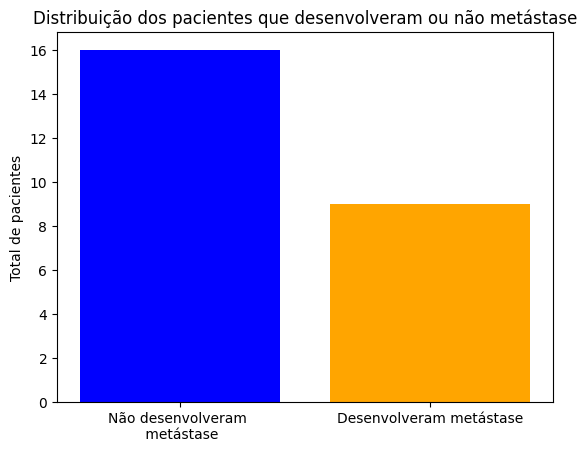

In [24]:
import matplotlib.pyplot as plt

plt.bar([0,1], y.value_counts().values, color=['blue', 'orange'])

# Adding labels and title
# plt.xlabel('Target Value')
plt.ylabel('Total de pacientes')
plt.title('Distribuição dos pacientes que desenvolveram ou não metástase')

# Adding tick labels
plt.xticks(ticks=[0,1], labels=['Não desenvolveram \n metástase', 
                                'Desenvolveram metástase'])
, 
# Display the plot
plt.show()

* Sabemos que as classes estão suficientemente balanceadas (60 - 40)

In [25]:
X_scaled.head()

,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,STIR_original_shape_MinorAxisLength,...,T1_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength
0,1.651941,1.485907,-1.077971,-1.154323,-1.159156,-1.206151,-0.814173,-1.242693,-0.830563,-1.019341,...,-0.643821,-0.344978,0.875812,0.137223,0.623478,-0.884154,1.446780,-0.070697,0.896843,0.739579
1,0.137972,1.702777,-0.626915,-0.952593,-1.027203,-0.927442,-0.871435,-0.983012,-0.776160,-1.068479,...,3.760295,3.415311,0.231198,-0.303247,0.749701,-0.418358,0.437372,-0.464536,0.220436,0.121654
2,-1.055980,-0.464389,-0.088952,0.024161,0.666550,0.108184,-0.463072,0.254699,-0.378286,-0.378418,...,1.319738,1.560856,-0.433896,-0.463795,0.206452,0.705308,-0.549244,-0.571929,-0.512828,-0.663160
3,-0.127285,0.427841,-1.389197,-1.175410,-0.900590,-1.202407,-1.106724,-1.024311,-0.876443,-1.415654,...,-0.574289,-0.185976,0.229596,-0.292565,0.384589,-0.894480,2.047107,-0.440707,-0.255956,1.724868
4,0.536206,0.407014,-0.412441,-0.540767,-0.457184,-0.618912,-0.403382,-0.624306,-0.580304,-0.382970,...,-0.251407,0.069056,-0.843338,-0.511756,-0.236807,-0.385612,0.079022,-0.674799,-0.580402,-0.679682


In [26]:
y.head()

,T1_LungMets
0,0
1,0
2,0
3,0
4,0


## Feature Selection and preparing final data for training and prediction

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

N_FEATURES = 150

X = SelectKBest(f_classif, k=N_FEATURES).fit_transform(X_scaled, y)
X.shape

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


(25, 150)

## Searching for best hyperparameters for the Multi-Layer Perceptron (MLP) Neural Network

In [28]:
from matplotlib import rcParams
from sklearn.model_selection import LeaveOneOut, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import (
                            accuracy_score, 
                            precision_score, 
                            recall_score,
                            f1_score, 
                            roc_curve, 
                            auc, 
                            confusion_matrix, 
                            ConfusionMatrixDisplay
                            )


In [28]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score

RANDOM_SEED=28

# Define a function to create your Keras model
def create_model(input_dim, hidden_units=128, dropout_rate=0.5, learning_rate=0.001):
    
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=[
                      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                      tf.keras.metrics.Recall(name='recall'),
                      tf.keras.metrics.Precision(name='precision')
                  ]
                 )
    
    return model

# Create a KerasClassifier for scikit-learn compatibility
model = KerasClassifier(build_fn=create_model, input_dim=N_FEATURES, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'hidden_units': [64, 128, 256, 512],
    'dropout_rate': [0.4, 0.5, 0.6],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
    'batch_size': [4, 8, 16], # 32
    'epochs': [100] # 50
}

# Define a custom scoring function that combines accuracy, precision, and recall
def custom_scorer(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    # You can assign weights to each metric as needed
    combined_score = 0.6 * accuracy + 0.15 * precision + 0.25 * recall
    
    return combined_score

# Create a scorer based on the custom scoring function
scoring = make_scorer(custom_scorer)

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring=scoring,
                                   n_iter=100, cv=3, verbose=2, random_state=RANDOM_SEED, refit=True)

# Fit the RandomizedSearchCV to your data
random_search.fit(X,y) # X_train, y_train

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

## Instantiating the architecture of the Multi-Layer Perceptron (MLP) Neural Network 

In [29]:
def mlp_model():
    
    # Defining the Sequential model
    model = Sequential([
        Dense(1024, activation='relu', input_dim=N_FEATURES),
        Dropout(0.6),
        
        Dense(1024 // 2, activation='relu'),
        Dropout(0.6),
        
        Dense(1024 // 4, activation='relu'),
        Dropout(0.6),
        
        Dense(1, activation='sigmoid')
    ])

    # Compiling the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=[
                      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                      tf.keras.metrics.Recall(name='recall'),
                      tf.keras.metrics.Precision(name='precision')
                  ]
                 )
    
    return model

# Train the model with early stopping to prevent overfitting 
# (does not work to LOOCV, only when we specify validation data)
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=10,  # You can adjust the patience as needed
#     restore_best_weights=True
# )

## Test: LOOCV

In [30]:
# Define the number of epochs
N_EPOCHS=150 #150
THRESHOLD_VAL=0.5
BATCH_SIZE=4 # 4

# Initialize lists to store predicted probabilities and binary predictions
probs_preds_list = []
binary_preds_list = []

# Initialize lists to store training history metrics for plotting
loss_list = []
accuracy_list = []
y_list = []

# Define the feature and label datasets
X = pd.DataFrame(X)
y = y

# 'val_accuracy', 'val_loss'

In [31]:
# Perform LOOCV
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Instantiate the model
    model = mlp_model()
    
    # Fit the model on the training data
    history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, 
                        verbose=1) # callbacks=[early_stopping], use_multiprocessing=True

     # Evaluate the model on the test data and store predictions
    y_probs = model.predict(X_test)
    y_pred_binary = (y_probs >= THRESHOLD_VAL).astype(int)
    
    # Store predicted probabilities and binary predictions for this fold
    # along with it's true label
    probs_preds_list.append(y_probs[0][0])
    binary_preds_list.append(y_pred_binary[0][0])
    y_list.append(y_test.values[0][0])

    # Store the training history metrics for this fold
    loss_list.append(history.history['loss'])
    accuracy_list.append(history.history['accuracy'])



Epoch 1/150


2023-09-19 23:13:54.112929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 23:13:54.113163: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 23:13:54.113266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

6/6 [==============================] - 2s 4ms/step - loss: 5.4723 - accuracy: 0.6667 - recall: 0.1111 - precision: 1.0000
Epoch 2/150
6/6 [==============================] - 0s 4ms/step - loss: 28.4736 - accuracy: 0.5833 - recall: 0.8889 - precision: 0.4706
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 12.7947 - accuracy: 0.6667 - recall: 0.3333 - precision: 0.6000
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 12.5530 - accuracy: 0.7500 - recall: 0.5556 - precision: 0.7143
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 12.9482 - accuracy: 0.7917 - recall: 0.8889 - precision: 0.6667    
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9425 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889        
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 10.2173 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 8/150
6/6 [==============================] - 0s 3ms

6/6 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 62/150
6/6 [==============================] - 0s 3ms/step - loss: 14.6628 - accuracy: 0.7917 - recall: 0.5556 - precision: 0.8333       
Epoch 63/150
6/6 [==============================] - 0s 3ms/step - loss: 28.1218 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 64/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1742 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 65/150
6/6 [==============================] - 0s 3ms/step - loss: 3.2019 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182        
Epoch 66/150
6/6 [==============================] - 0s 3ms/step - loss: 22.5089 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571       
Epoch 67/150
6/6 [==============================] - 0s 3ms/step - loss: 4.0864 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000
Epoch 68/150
6/6 [=========================

6/6 [==============================] - 0s 3ms/step - loss: 3.5061 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 121/150
6/6 [==============================] - 0s 3ms/step - loss: 1.3948e-05 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 122/150
6/6 [==============================] - 0s 3ms/step - loss: 25.2130 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 123/150
6/6 [==============================] - 0s 4ms/step - loss: 29.4062 - accuracy: 0.8333 - recall: 0.5556 - precision: 1.0000
Epoch 124/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 125/150
6/6 [==============================] - 0s 2ms/step - loss: 11.3407 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 126/150
6/6 [==============================] - 0s 2ms/step - loss: 2.9340e-35 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 127/150
6/6 [============================

6/6 [==============================] - 0s 3ms/step - loss: 33.0913 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 30/150
6/6 [==============================] - 0s 3ms/step - loss: 71.1630 - accuracy: 0.7917 - recall: 0.5556 - precision: 0.8333
Epoch 31/150
6/6 [==============================] - 0s 3ms/step - loss: 16.7787 - accuracy: 0.8750 - recall: 0.6667 - precision: 1.0000    
Epoch 32/150
6/6 [==============================] - 0s 3ms/step - loss: 9.9220 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500        
Epoch 33/150
6/6 [==============================] - 0s 3ms/step - loss: 2.7340 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 34/150
6/6 [==============================] - 0s 2ms/step - loss: 10.4942 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 35/150
6/6 [==============================] - 0s 3ms/step - loss: 1.9163 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 36/150
6/6 [==============================] - 

6/6 [==============================] - 0s 3ms/step - loss: 22.6457 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 89/150
6/6 [==============================] - 0s 3ms/step - loss: 1.4751e-30 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 90/150
6/6 [==============================] - 0s 3ms/step - loss: 2.0710e-05 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 91/150
6/6 [==============================] - 0s 3ms/step - loss: 3.5077 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000
Epoch 92/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2553e-14 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 93/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 94/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 95/150
6/6 [==============================] -

6/6 [==============================] - 0s 3ms/step - loss: 0.2252 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 148/150
6/6 [==============================] - 0s 3ms/step - loss: 65.1012 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 149/150
6/6 [==============================] - 0s 3ms/step - loss: 15.8090 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 150/150
1/1 [==============================] - 0s 40ms/step
Epoch 1/150
6/6 [==============================] - 1s 3ms/step - loss: 4.4804 - accuracy: 0.6250 - recall: 0.5556 - precision: 0.5000
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 12.7969 - accuracy: 0.6667 - recall: 0.3333 - precision: 0.6000   
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 23.8473 - accuracy: 0.6250 - recall: 0.7778 - precision: 0.5000
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 19.3991 - accuracy: 0.6250 - recall: 0.3333 - precision: 0.5

6/6 [==============================] - 0s 3ms/step - loss: 12.8040 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 57/150
6/6 [==============================] - 0s 2ms/step - loss: 3.1201 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 58/150
6/6 [==============================] - 0s 3ms/step - loss: 14.3534 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 59/150
6/6 [==============================] - 0s 3ms/step - loss: 8.8523 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 60/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2294e-10 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 61/150
6/6 [==============================] - 0s 3ms/step - loss: 2.9140 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 62/150
6/6 [==============================] - 0s 3ms/step - loss: 10.6637 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500
Epoch 63/150
6/6 [==============================] - 0s 3ms/st

6/6 [==============================] - 0s 3ms/step - loss: 2.7930e-32 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 116/150
6/6 [==============================] - 0s 3ms/step - loss: 10.9281 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 117/150
6/6 [==============================] - 0s 2ms/step - loss: 4.8180 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000     
Epoch 118/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 119/150
6/6 [==============================] - 0s 3ms/step - loss: 5.6625e-36 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 120/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 121/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 122/150
6/6 [=================

6/6 [==============================] - 0s 3ms/step - loss: 0.9845 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 25/150
6/6 [==============================] - 0s 3ms/step - loss: 1.8237 - accuracy: 0.8750 - recall: 0.6667 - precision: 1.0000
Epoch 26/150
6/6 [==============================] - 0s 3ms/step - loss: 1.7823 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 27/150
6/6 [==============================] - 0s 2ms/step - loss: 2.3503 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273    
Epoch 28/150
6/6 [==============================] - 0s 2ms/step - loss: 5.0938 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750    
Epoch 29/150
6/6 [==============================] - 0s 3ms/step - loss: 6.8877 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 30/150
6/6 [==============================] - 0s 2ms/step - loss: 1.1121 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889        
Epoch 31/150
6/6 [==============================] - 

6/6 [==============================] - 0s 3ms/step - loss: 8.4486 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 85/150
6/6 [==============================] - 0s 3ms/step - loss: 10.5711 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182   
Epoch 86/150
6/6 [==============================] - 0s 3ms/step - loss: 21.3259 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 87/150
6/6 [==============================] - 0s 3ms/step - loss: 1.3865 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 88/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 89/150
6/6 [==============================] - 0s 2ms/step - loss: 4.9606 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 90/150
6/6 [==============================] - 0s 3ms/step - loss: 12.8296 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 91/150
6/6 [==============================] - 0s 3ms/ste

6/6 [==============================] - 0s 3ms/step - loss: 322.6941 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 144/150
6/6 [==============================] - 0s 2ms/step - loss: 39.2901 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 145/150
6/6 [==============================] - 0s 2ms/step - loss: 59.5672 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000
Epoch 146/150
6/6 [==============================] - 0s 2ms/step - loss: 23.0142 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750    
Epoch 147/150
6/6 [==============================] - 0s 3ms/step - loss: 61.7201 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 148/150
6/6 [==============================] - 0s 3ms/step - loss: 67.8161 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 149/150
6/6 [==============================] - 0s 3ms/step - loss: 120.2862 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 150/150
1/1 [==============================

6/6 [==============================] - 0s 3ms/step - loss: 1.5277e-10 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 53/150
6/6 [==============================] - 0s 3ms/step - loss: 4.3884e-11 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 54/150
6/6 [==============================] - 0s 2ms/step - loss: 13.4429 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 55/150
6/6 [==============================] - 0s 2ms/step - loss: 4.7179e-06 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 56/150
6/6 [==============================] - 0s 2ms/step - loss: 9.0906 - accuracy: 0.7917 - recall: 0.4444 - precision: 1.0000
Epoch 57/150
6/6 [==============================] - 0s 2ms/step - loss: 1.2956 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 58/150
6/6 [==============================] - 0s 2ms/step - loss: 4.4132 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 59/150
6/6 [==============================] - 0s 

6/6 [==============================] - 0s 2ms/step - loss: 42.0683 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 112/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 113/150
6/6 [==============================] - 0s 2ms/step - loss: 45.5625 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 114/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 115/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 116/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 117/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 118/150
6/6 [=====================

6/6 [==============================] - 0s 3ms/step - loss: 16.7848 - accuracy: 0.8333 - recall: 0.5556 - precision: 1.0000       
Epoch 15/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 16/150
6/6 [==============================] - 0s 3ms/step - loss: 9.2044 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923     
Epoch 17/150
6/6 [==============================] - 0s 3ms/step - loss: 3.0467 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182     
Epoch 18/150
6/6 [==============================] - 0s 2ms/step - loss: 4.6559 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000     
Epoch 19/150
6/6 [==============================] - 0s 2ms/step - loss: 17.0597 - accuracy: 0.8750 - recall: 0.6667 - precision: 1.0000       
Epoch 20/150
6/6 [==============================] - 0s 2ms/step - loss: 7.4538 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 21/150
6/6 [===================

6/6 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 74/150
6/6 [==============================] - 0s 3ms/step - loss: 5.5007e-16 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 75/150
6/6 [==============================] - 0s 3ms/step - loss: 2.4262e-21 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 76/150
6/6 [==============================] - 0s 2ms/step - loss: 6.5993 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000        
Epoch 77/150
6/6 [==============================] - 0s 2ms/step - loss: 4.7821e-26 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 78/150
6/6 [==============================] - 0s 2ms/step - loss: 5.7657e-16 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 79/150
6/6 [==============================] - 0s 2ms/step - loss: 8.5962 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 80/150
6/6 [==========================

6/6 [==============================] - 0s 3ms/step - loss: 5.5394 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 133/150
6/6 [==============================] - 0s 3ms/step - loss: 22.8456 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 134/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 135/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 136/150
6/6 [==============================] - 0s 2ms/step - loss: 17.2988 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 137/150
6/6 [==============================] - 0s 2ms/step - loss: 4.4179 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000        
Epoch 138/150
6/6 [==============================] - 0s 2ms/step - loss: 12.1293 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000    
Epoch 139/150
6/6 [====================

6/6 [==============================] - 0s 3ms/step - loss: 2.3428 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 37/150
6/6 [==============================] - 0s 3ms/step - loss: 1.8606 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 38/150
6/6 [==============================] - 0s 2ms/step - loss: 1.5303 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 39/150
6/6 [==============================] - 0s 2ms/step - loss: 2.1384 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 40/150
6/6 [==============================] - 0s 3ms/step - loss: 1.6408 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 41/150
6/6 [==============================] - 0s 2ms/step - loss: 4.9059 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 42/150
6/6 [==============================] - 0s 2ms/step - loss: 8.0105 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923        
Epoch 43/150
6/6 [==============================] - 0s 2ms/s

6/6 [==============================] - 0s 2ms/step - loss: 38.7626 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 96/150
6/6 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 97/150
6/6 [==============================] - 0s 3ms/step - loss: 7.4346 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 98/150
6/6 [==============================] - 0s 3ms/step - loss: 37.5071 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 99/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5934 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 100/150
6/6 [==============================] - 0s 2ms/step - loss: 7.2437 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000    
Epoch 101/150
6/6 [==============================] - 0s 2ms/step - loss: 2.8582 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000        
Epoch 102/150
6/6 [==============================] -

6/6 [==============================] - 0s 2ms/step - loss: 14.0653 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 17.7416 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 9.4482 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778     
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 9.8691 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 20.3792 - accuracy: 0.7500 - recall: 0.3333 - precision: 1.0000    
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 25.4758 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 12.5735 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 11/150
6/6 [==============================] - 0s 3ms/

6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 65/150
6/6 [==============================] - 0s 2ms/step - loss: 30.7278 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 66/150
6/6 [==============================] - 0s 2ms/step - loss: 1.3223 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 67/150
6/6 [==============================] - 0s 3ms/step - loss: 2.0157e-08 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 68/150
6/6 [==============================] - 0s 3ms/step - loss: 42.5141 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000     
Epoch 69/150
6/6 [==============================] - 0s 2ms/step - loss: 2.5842 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 70/150
6/6 [==============================] - 0s 2ms/step - loss: 20.3552 - accuracy: 0.8750 - recall: 0.6667 - precision: 1.0000    
Epoch 71/150
6/6 [==============================

6/6 [==============================] - 0s 3ms/step - loss: 16.7263 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 124/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 125/150
6/6 [==============================] - 0s 3ms/step - loss: 34.2150 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000
Epoch 126/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 127/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 128/150
6/6 [==============================] - 0s 3ms/step - loss: 89.1762 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 129/150
6/6 [==============================] - 0s 3ms/step - loss: 4.6994 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 130/150
6/6 [============================

6/6 [==============================] - 0s 2ms/step - loss: 1.8321 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 33/150
6/6 [==============================] - 0s 2ms/step - loss: 5.2854 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 34/150
6/6 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 35/150
6/6 [==============================] - 0s 2ms/step - loss: 5.5188 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571
Epoch 36/150
6/6 [==============================] - 0s 2ms/step - loss: 2.4957 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 37/150
6/6 [==============================] - 0s 3ms/step - loss: 3.5790 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 38/150
6/6 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889        
Epoch 39/150
6/6 [==============================] - 0s 3ms/s

6/6 [==============================] - 0s 2ms/step - loss: 1.1859 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 92/150
6/6 [==============================] - 0s 2ms/step - loss: 1.3099e-06 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 93/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 94/150
6/6 [==============================] - 0s 3ms/step - loss: 2.9616 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 95/150
6/6 [==============================] - 0s 2ms/step - loss: 1.1872 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889        
Epoch 96/150
6/6 [==============================] - 0s 3ms/step - loss: 3.7555 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 97/150
6/6 [==============================] - 0s 2ms/step - loss: 1.1040 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000        
Epoch 98/150
6/6 [==========================

1/1 [==============================] - 0s 42ms/step
Epoch 1/150
6/6 [==============================] - 1s 3ms/step - loss: 1.9571 - accuracy: 0.5833 - recall: 0.4444 - precision: 0.4444    
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 7.8285 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 3.7104 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 7.9633 - accuracy: 0.7083 - recall: 0.6667 - precision: 0.6000
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 16.5219 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 5.3980 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000     
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 8.6682 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000 

6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 60/150
6/6 [==============================] - 0s 2ms/step - loss: 4.6110 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 61/150
6/6 [==============================] - 0s 2ms/step - loss: 4.7572e-22 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 62/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 63/150
6/6 [==============================] - 0s 3ms/step - loss: 2.2063e-23 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 64/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2122 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 65/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 66/150
6/6 [==============================

6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 119/150
6/6 [==============================] - 0s 3ms/step - loss: 7.0407e-37 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 120/150
6/6 [==============================] - 0s 3ms/step - loss: 24.1186 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 121/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 122/150
6/6 [==============================] - 0s 3ms/step - loss: 289.9500 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 123/150
6/6 [==============================] - 0s 3ms/step - loss: 8.8615e-23 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 124/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 125/150
6/6 [========================

6/6 [==============================] - 0s 2ms/step - loss: 8.8585 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 28/150
6/6 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000        
Epoch 29/150
6/6 [==============================] - 0s 3ms/step - loss: 1.6551 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000        
Epoch 30/150
6/6 [==============================] - 0s 2ms/step - loss: 2.4499e-08 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 31/150
6/6 [==============================] - 0s 3ms/step - loss: 1.4617 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 32/150
6/6 [==============================] - 0s 2ms/step - loss: 1.2322 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 33/150
6/6 [==============================] - 0s 3ms/step - loss: 8.7065 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571
Epoch 34/150
6/6 [==========================

6/6 [==============================] - 0s 2ms/step - loss: 13.2145 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 87/150
6/6 [==============================] - 0s 2ms/step - loss: 5.6912 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 88/150
6/6 [==============================] - 0s 2ms/step - loss: 95.3594 - accuracy: 0.8750 - recall: 0.6250 - precision: 1.0000
Epoch 89/150
6/6 [==============================] - 0s 3ms/step - loss: 29.1021 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 90/150
6/6 [==============================] - 0s 2ms/step - loss: 9.5851 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 91/150
6/6 [==============================] - 0s 2ms/step - loss: 5.8116 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 92/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 93/150
6/6 [==============================] - 0s 2ms/step -

6/6 [==============================] - 0s 3ms/step - loss: 40.9674 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000       
Epoch 146/150
6/6 [==============================] - 0s 3ms/step - loss: 52.9212 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 147/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 148/150
6/6 [==============================] - 0s 3ms/step - loss: 6.4412 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 149/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 150/150
1/1 [==============================] - 0s 40ms/step
Epoch 1/150
6/6 [==============================] - 1s 3ms/step - loss: 2.8280 - accuracy: 0.7083 - recall: 0.6250 - precision: 0.5556
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 30.2639 - accuracy: 0.6667 - recall: 0.0000e+0

6/6 [==============================] - 0s 3ms/step - loss: 12.3215 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 55/150
6/6 [==============================] - 0s 2ms/step - loss: 14.1788 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 56/150
6/6 [==============================] - 0s 3ms/step - loss: 28.5240 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889     
Epoch 57/150
6/6 [==============================] - 0s 3ms/step - loss: 1.3050 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 58/150
6/6 [==============================] - 0s 2ms/step - loss: 8.9805 - accuracy: 0.9167 - recall: 0.7500 - precision: 1.0000
Epoch 59/150
6/6 [==============================] - 0s 3ms/step - loss: 1.6491 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889        
Epoch 60/150
6/6 [==============================] - 0s 2ms/step - loss: 3.2743e-22 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 61/150
6/6 [==========================

6/6 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 114/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 115/150
6/6 [==============================] - 0s 3ms/step - loss: 3.7078e-32 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 116/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 117/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 118/150
6/6 [==============================] - 0s 2ms/step - loss: 4.2181e-25 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 119/150
6/6 [==============================] - 0s 3ms/step - loss: 3.1691e-07 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 120/150
6/6 [===================

6/6 [==============================] - 0s 3ms/step - loss: 1.1796 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7273
Epoch 22/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 23/150
6/6 [==============================] - 0s 3ms/step - loss: 4.0876 - accuracy: 0.8333 - recall: 0.7500 - precision: 0.7500
Epoch 24/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 25/150
6/6 [==============================] - 0s 3ms/step - loss: 2.1852 - accuracy: 0.8333 - recall: 0.6250 - precision: 0.8333    
Epoch 26/150
6/6 [==============================] - 0s 2ms/step - loss: 1.1707 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 27/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 28/150
6/6 [==============================] - 0s 2ms/step 

6/6 [==============================] - 0s 2ms/step - loss: 18.0865 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 81/150
6/6 [==============================] - 0s 3ms/step - loss: 15.6641 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 82/150
6/6 [==============================] - 0s 3ms/step - loss: 2.4911 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000        
Epoch 83/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 84/150
6/6 [==============================] - 0s 3ms/step - loss: 3.0069 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 85/150
6/6 [==============================] - 0s 2ms/step - loss: 8.2995 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 86/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 87/150
6/6 [==============================] - 0s 2ms

6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 140/150
6/6 [==============================] - 0s 2ms/step - loss: 2.8448e-08 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 141/150
6/6 [==============================] - 0s 2ms/step - loss: 8.2422e-37 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 142/150
6/6 [==============================] - 0s 2ms/step - loss: 20.8801 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 143/150
6/6 [==============================] - 0s 2ms/step - loss: 3.1999e-11 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 144/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 145/150
6/6 [==============================] - 0s 3ms/step - loss: 1.8977e-18 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 146/150
6/6 [======================

6/6 [==============================] - 0s 2ms/step - loss: 4.9158 - accuracy: 0.8750 - recall: 0.6667 - precision: 1.0000
Epoch 49/150
6/6 [==============================] - 0s 2ms/step - loss: 2.0434 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000        
Epoch 50/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 51/150
6/6 [==============================] - 0s 2ms/step - loss: 1.9733 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 52/150
6/6 [==============================] - 0s 3ms/step - loss: 1.3473e-16 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 53/150
6/6 [==============================] - 0s 2ms/step - loss: 6.8685 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 54/150
6/6 [==============================] - 0s 3ms/step - loss: 2.2075 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000        
Epoch 55/150
6/6 [==============================

6/6 [==============================] - 0s 2ms/step - loss: 8.2822 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182     
Epoch 108/150
6/6 [==============================] - 0s 2ms/step - loss: 13.7788 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 109/150
6/6 [==============================] - 0s 2ms/step - loss: 4.1503 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182    
Epoch 110/150
6/6 [==============================] - 0s 2ms/step - loss: 15.0194 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000
Epoch 111/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 112/150
6/6 [==============================] - 0s 2ms/step - loss: 81.7920 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 113/150
6/6 [==============================] - 0s 2ms/step - loss: 1.5645e-10 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 114/150
6/6 [===========================

6/6 [==============================] - 0s 3ms/step - loss: 2.4013 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 17/150
6/6 [==============================] - 0s 3ms/step - loss: 3.2530 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 18/150
6/6 [==============================] - 0s 3ms/step - loss: 9.0377 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 19/150
6/6 [==============================] - 0s 3ms/step - loss: 9.5568 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667
Epoch 20/150
6/6 [==============================] - 0s 3ms/step - loss: 1.0273 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 21/150
6/6 [==============================] - 0s 3ms/step - loss: 1.1349 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 22/150
6/6 [==============================] - 0s 3ms/step - loss: 1.8967 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000     
Epoch 23/150
6/6 [==============================] - 0s 3ms/step

6/6 [==============================] - 0s 3ms/step - loss: 58.8112 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 77/150
6/6 [==============================] - 0s 3ms/step - loss: 167.3612 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 78/150
6/6 [==============================] - 0s 3ms/step - loss: 245.2736 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 79/150
6/6 [==============================] - 0s 3ms/step - loss: 30.5985 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 80/150
6/6 [==============================] - 0s 3ms/step - loss: 182.6194 - accuracy: 0.8333 - recall: 0.5556 - precision: 1.0000    
Epoch 81/150
6/6 [==============================] - 0s 3ms/step - loss: 222.2159 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000    
Epoch 82/150
6/6 [==============================] - 0s 3ms/step - loss: 280.8636 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 83/150
6/6 [==============================

6/6 [==============================] - 0s 3ms/step - loss: 21.9556 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 136/150
6/6 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 137/150
6/6 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 138/150
6/6 [==============================] - 0s 3ms/step - loss: 14.9530 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 139/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 140/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 141/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 142/150
6/6 [=====================

6/6 [==============================] - 0s 3ms/step - loss: 3.5397 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000
Epoch 45/150
6/6 [==============================] - 0s 3ms/step - loss: 21.1233 - accuracy: 0.8333 - recall: 0.5556 - precision: 1.0000       
Epoch 46/150
6/6 [==============================] - 0s 3ms/step - loss: 3.6878e-06 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 47/150
6/6 [==============================] - 0s 3ms/step - loss: 8.5195 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 48/150
6/6 [==============================] - 0s 3ms/step - loss: 4.0346 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 49/150
6/6 [==============================] - 0s 3ms/step - loss: 8.6342 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000
Epoch 50/150
6/6 [==============================] - 0s 4ms/step - loss: 9.2330e-10 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 51/150
6/6 [==============================] - 

6/6 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 104/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 105/150
6/6 [==============================] - 0s 3ms/step - loss: 1.5379e-15 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 106/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 107/150
6/6 [==============================] - 0s 3ms/step - loss: 8.3415 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000        
Epoch 108/150
6/6 [==============================] - 0s 3ms/step - loss: 9.9492 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000        
Epoch 109/150
6/6 [==============================] - 0s 3ms/step - loss: 1.5421e-24 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 110/150
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 4.7476 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000
Epoch 12/150
6/6 [==============================] - 0s 2ms/step - loss: 11.7146 - accuracy: 0.6250 - recall: 0.5000 - precision: 0.4444   
Epoch 13/150
6/6 [==============================] - 0s 2ms/step - loss: 3.6250 - accuracy: 0.8750 - recall: 0.6250 - precision: 1.0000
Epoch 14/150
6/6 [==============================] - 0s 2ms/step - loss: 1.0344 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 15/150
6/6 [==============================] - 0s 2ms/step - loss: 0.7807 - accuracy: 0.8333 - recall: 0.7500 - precision: 0.7500
Epoch 16/150
6/6 [==============================] - 0s 2ms/step - loss: 3.8813 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571
Epoch 17/150
6/6 [==============================] - 0s 2ms/step - loss: 10.8014 - accuracy: 0.8333 - recall: 0.7500 - precision: 0.7500
Epoch 18/150
6/6 [==============================] - 0s 3ms/step

6/6 [==============================] - 0s 3ms/step - loss: 5.6151 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778    
Epoch 72/150
6/6 [==============================] - 0s 2ms/step - loss: 3.3177 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 73/150
6/6 [==============================] - 0s 2ms/step - loss: 7.0099 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571
Epoch 74/150
6/6 [==============================] - 0s 2ms/step - loss: 10.4285 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 75/150
6/6 [==============================] - 0s 2ms/step - loss: 10.3612 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 76/150
6/6 [==============================] - 0s 2ms/step - loss: 37.5882 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 77/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2001 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 78/150
6/6 [==============================] - 0s 3ms/st

6/6 [==============================] - 0s 2ms/step - loss: 25.7124 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 131/150
6/6 [==============================] - 0s 2ms/step - loss: 9.5499e-12 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 132/150
6/6 [==============================] - 0s 2ms/step - loss: 4.4668e-13 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 133/150
6/6 [==============================] - 0s 2ms/step - loss: 9.1068 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 134/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 135/150
6/6 [==============================] - 0s 2ms/step - loss: 5.8635 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 136/150
6/6 [==============================] - 0s 3ms/step - loss: 18.8776 - accuracy: 0.9167 - recall: 0.7500 - precision: 1.0000
Epoch 137/150
6/6 [=============================

6/6 [==============================] - 0s 2ms/step - loss: 0.7316 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 40/150
6/6 [==============================] - 0s 3ms/step - loss: 5.4755e-10 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 41/150
6/6 [==============================] - 0s 3ms/step - loss: 5.4158 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 42/150
6/6 [==============================] - 0s 3ms/step - loss: 4.8298e-07 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 43/150
6/6 [==============================] - 0s 3ms/step - loss: 11.7855 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 44/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1608 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 45/150
6/6 [==============================] - 0s 3ms/step - loss: 1.4800 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 46/150
6/6 [==============================] - 0s 2ms/

6/6 [==============================] - 0s 3ms/step - loss: 28.3200 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 99/150
6/6 [==============================] - 0s 3ms/step - loss: 41.6765 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 100/150
6/6 [==============================] - 0s 3ms/step - loss: 31.3453 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000
Epoch 101/150
6/6 [==============================] - 0s 3ms/step - loss: 183.5529 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 102/150
6/6 [==============================] - 0s 2ms/step - loss: 790.7627 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 103/150
6/6 [==============================] - 0s 3ms/step - loss: 61.2539 - accuracy: 0.8750 - recall: 0.6667 - precision: 1.0000
Epoch 104/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 105/150
6/6 [==============================] 

6/6 [==============================] - 0s 3ms/step - loss: 13.6015 - accuracy: 0.7917 - recall: 0.8889 - precision: 0.6667    
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 18.1223 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667    
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 2.7432 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 10/150
6/6 [==============================] - 0s 2ms/step - loss: 2.1994 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 11/150
6/6 [==============================] - 0s 3ms/step - loss: 2.6635 - accuracy: 0.8750 - recall: 0.6667 - precision: 1.0000    
Epoch 12/150
6/6 [==============================] - 0s 3ms/step - loss: 11.8808 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 13/150
6/6 [==============================] - 0s 2ms/step - loss: 9.5691 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 14/150
6/6 [==============================] - 0s 

6/6 [==============================] - 0s 3ms/step - loss: 3.6835e-06 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 68/150
6/6 [==============================] - 0s 2ms/step - loss: 4.1163 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 69/150
6/6 [==============================] - 0s 2ms/step - loss: 3.2125 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000        
Epoch 70/150
6/6 [==============================] - 0s 3ms/step - loss: 3.4144 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 71/150
6/6 [==============================] - 0s 2ms/step - loss: 4.7216 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 72/150
6/6 [==============================] - 0s 2ms/step - loss: 4.8983e-36 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 73/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 74/150
6/6 [==============================] - 

6/6 [==============================] - 0s 3ms/step - loss: 292.6664 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 127/150
6/6 [==============================] - 0s 3ms/step - loss: 67.4005 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 128/150
6/6 [==============================] - 0s 3ms/step - loss: 163.4124 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 129/150
6/6 [==============================] - 0s 2ms/step - loss: 104.6647 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 130/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 131/150
6/6 [==============================] - 0s 2ms/step - loss: 152.4345 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 132/150
6/6 [==============================] - 0s 2ms/step - loss: 83.0489 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 133/150
6/6 [=============================

6/6 [==============================] - 0s 3ms/step - loss: 5.6782 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000        
Epoch 36/150
6/6 [==============================] - 0s 3ms/step - loss: 5.3868 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 37/150
6/6 [==============================] - 0s 3ms/step - loss: 8.9739 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 38/150
6/6 [==============================] - 0s 2ms/step - loss: 22.4440 - accuracy: 0.8750 - recall: 0.6667 - precision: 1.0000
Epoch 39/150
6/6 [==============================] - 0s 3ms/step - loss: 6.2954 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889        
Epoch 40/150
6/6 [==============================] - 0s 2ms/step - loss: 8.6538 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 41/150
6/6 [==============================] - 0s 3ms/step - loss: 8.9752 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 42/150
6/6 [==============================] -

6/6 [==============================] - 0s 2ms/step - loss: 11.6897 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 95/150
6/6 [==============================] - 0s 2ms/step - loss: 1.3146e-22 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 96/150
6/6 [==============================] - 0s 3ms/step - loss: 1.5222e-08 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 97/150
6/6 [==============================] - 0s 3ms/step - loss: 6.7144e-12 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 98/150
6/6 [==============================] - 0s 2ms/step - loss: 1.8582e-14 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 99/150
6/6 [==============================] - 0s 3ms/step - loss: 3.6505e-23 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 100/150
6/6 [==============================] - 0s 2ms/step - loss: 9.5344e-16 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 101/150
6/6 [===================

6/6 [==============================] - 0s 2ms/step - loss: 4.9158 - accuracy: 0.7083 - recall: 0.8750 - precision: 0.5385    
Epoch 3/150
6/6 [==============================] - 0s 2ms/step - loss: 10.5415 - accuracy: 0.7500 - recall: 0.3750 - precision: 0.7500
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 4.1195 - accuracy: 0.7917 - recall: 1.0000 - precision: 0.6154
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 8.0719 - accuracy: 0.7083 - recall: 0.2500 - precision: 0.6667
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 5.6240 - accuracy: 0.7500 - recall: 0.7500 - precision: 0.6000
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 1.8647 - accuracy: 0.8333 - recall: 0.6250 - precision: 0.8333
Epoch 8/150
6/6 [==============================] - 0s 2ms/step - loss: 4.1388 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss

Epoch 62/150
6/6 [==============================] - 0s 3ms/step - loss: 33.4502 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7273
Epoch 63/150
6/6 [==============================] - 0s 2ms/step - loss: 97.6141 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000
Epoch 64/150
6/6 [==============================] - 0s 3ms/step - loss: 87.8325 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 65/150
6/6 [==============================] - 0s 3ms/step - loss: 97.1119 - accuracy: 0.7917 - recall: 0.3750 - precision: 1.0000
Epoch 66/150
6/6 [==============================] - 0s 2ms/step - loss: 96.4550 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7273
Epoch 67/150
6/6 [==============================] - 0s 2ms/step - loss: 30.3835 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 68/150
6/6 [==============================] - 0s 2ms/step - loss: 6.5885e-13 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 69/150
6/6 [===========================

6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 122/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 123/150
6/6 [==============================] - 0s 3ms/step - loss: 29.4135 - accuracy: 0.9167 - recall: 0.7500 - precision: 1.0000       
Epoch 124/150
6/6 [==============================] - 0s 3ms/step - loss: 2.6640e-31 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 125/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 126/150
6/6 [==============================] - 0s 2ms/step - loss: 32.8745 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 127/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 128/150
6/6 [==============

6/6 [==============================] - 0s 3ms/step - loss: 3.5874 - accuracy: 0.8333 - recall: 0.6250 - precision: 0.8333        
Epoch 31/150
6/6 [==============================] - 0s 2ms/step - loss: 2.7987 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 32/150
6/6 [==============================] - 0s 3ms/step - loss: 4.0331 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 33/150
6/6 [==============================] - 0s 2ms/step - loss: 0.7786 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 34/150
6/6 [==============================] - 0s 2ms/step - loss: 17.6348 - accuracy: 0.8333 - recall: 0.5000 - precision: 1.0000
Epoch 35/150
6/6 [==============================] - 0s 3ms/step - loss: 18.1084 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778   
Epoch 36/150
6/6 [==============================] - 0s 3ms/step - loss: 9.0565 - accuracy: 0.7917 - recall: 1.0000 - precision: 0.6154
Epoch 37/150
6/6 [==============================] - 0s 

6/6 [==============================] - 0s 3ms/step - loss: 3.2373 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750        
Epoch 90/150
6/6 [==============================] - 0s 3ms/step - loss: 26.9959 - accuracy: 0.9167 - recall: 0.7500 - precision: 1.0000       
Epoch 91/150
6/6 [==============================] - 0s 3ms/step - loss: 17.4678 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 92/150
6/6 [==============================] - 0s 3ms/step - loss: 23.9379 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571       
Epoch 93/150
6/6 [==============================] - 0s 3ms/step - loss: 44.3317 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 94/150
6/6 [==============================] - 0s 3ms/step - loss: 33.9976 - accuracy: 0.8333 - recall: 0.7500 - precision: 0.7500
Epoch 95/150
6/6 [==============================] - 0s 2ms/step - loss: 9.1056 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 96/150
6/6 [=======================

6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 148/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 149/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 150/150
1/1 [==============================] - 0s 39ms/step
Epoch 1/150
6/6 [==============================] - 1s 3ms/step - loss: 4.9385 - accuracy: 0.5417 - recall: 0.3750 - precision: 0.3333
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 9.5784 - accuracy: 0.7083 - recall: 0.7500 - precision: 0.5455     
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 9.7222 - accuracy: 0.6667 - recall: 0.5000 - precision: 0.5000    
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 9.4774 - accuracy: 0.7500 - recall: 0.7500 - p

6/6 [==============================] - 0s 2ms/step - loss: 59.5482 - accuracy: 0.9167 - recall: 0.7500 - precision: 1.0000       
Epoch 57/150
6/6 [==============================] - 0s 3ms/step - loss: 11.1834 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 58/150
6/6 [==============================] - 0s 2ms/step - loss: 1.1673 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 59/150
6/6 [==============================] - 0s 3ms/step - loss: 15.7159 - accuracy: 0.7917 - recall: 0.7500 - precision: 0.6667
Epoch 60/150
6/6 [==============================] - 0s 3ms/step - loss: 14.3822 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 61/150
6/6 [==============================] - 0s 3ms/step - loss: 6.6447e-23 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 62/150
6/6 [==============================] - 0s 2ms/step - loss: 4.4367 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 63/150
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 116/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 117/150
6/6 [==============================] - 0s 3ms/step - loss: 8.0577e-26 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 118/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 119/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 120/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 121/150
6/6 [==============================] - 0s 3ms/step - loss: 4.1002 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 122/150
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 3.3983 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750    
Epoch 24/150
6/6 [==============================] - 0s 3ms/step - loss: 3.4110 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 25/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1170 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000
Epoch 26/150
6/6 [==============================] - 0s 2ms/step - loss: 1.0189 - accuracy: 0.8750 - recall: 0.6667 - precision: 1.0000
Epoch 27/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 28/150
6/6 [==============================] - 0s 3ms/step - loss: 1.7446 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 29/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5761 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000    
Epoch 30/150
6/6 [==============================] - 0s 3ms/s

6/6 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000        
Epoch 84/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 85/150
6/6 [==============================] - 0s 3ms/step - loss: 4.7394 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 86/150
6/6 [==============================] - 0s 2ms/step - loss: 7.3155e-20 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 87/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2228e-25 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 88/150
6/6 [==============================] - 0s 3ms/step - loss: 9.6737 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 89/150
6/6 [==============================] - 0s 3ms/step - loss: 5.3549 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 90/150
6/6 [==============================] - 

6/6 [==============================] - 0s 3ms/step - loss: 2.9883e-14 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 143/150
6/6 [==============================] - 0s 3ms/step - loss: 23.2650 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 144/150
6/6 [==============================] - 0s 3ms/step - loss: 166.7771 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 145/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 146/150
6/6 [==============================] - 0s 2ms/step - loss: 5.0270e-30 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 147/150
6/6 [==============================] - 0s 2ms/step - loss: 15.0225 - accuracy: 0.8750 - recall: 0.6667 - precision: 1.0000    
Epoch 148/150
6/6 [==============================] - 0s 3ms/step - loss: 55.0333 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000
Epoch 149/150
6/6 [======================

6/6 [==============================] - 0s 3ms/step - loss: 17.0069 - accuracy: 0.8750 - recall: 0.6250 - precision: 1.0000
Epoch 52/150
6/6 [==============================] - 0s 3ms/step - loss: 7.4194 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 53/150
6/6 [==============================] - 0s 3ms/step - loss: 1.5841 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 54/150
6/6 [==============================] - 0s 3ms/step - loss: 12.7013 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 55/150
6/6 [==============================] - 0s 2ms/step - loss: 6.7163 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 56/150
6/6 [==============================] - 0s 3ms/step - loss: 19.5798 - accuracy: 0.8333 - recall: 0.5000 - precision: 1.0000
Epoch 57/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000        
Epoch 58/150
6/6 [==============================] - 0s 3m

6/6 [==============================] - 0s 3ms/step - loss: 10.1834 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 111/150
6/6 [==============================] - 0s 3ms/step - loss: 1.5735 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 112/150
6/6 [==============================] - 0s 4ms/step - loss: 2.5040 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 113/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 114/150
6/6 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000        
Epoch 115/150
6/6 [==============================] - 0s 3ms/step - loss: 3.3426 - accuracy: 0.9583 - recall: 0.8750 - precision: 1.0000
Epoch 116/150
6/6 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 117/150
6/6 [======================

In [32]:
binary_list = binary_preds_list
probs_list = probs_preds_list
y_list = y_list

# Calculate and print the overall metrics after LOOCV
overall_accuracy = accuracy_score(y_list, binary_list)
overall_precision = precision_score(y_list, binary_list)
overall_recall = recall_score(y_list, binary_list)
overall_f1 = f1_score(y_list, binary_list)

print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Precision: {overall_precision:.2f}')
print(f'Overall Recall: {overall_recall:.2f}')
print(f'Overall F1 Score: {overall_f1:.2f}')

Overall Accuracy: 0.68
Overall Precision: 0.55
Overall Recall: 0.67
Overall F1 Score: 0.60


Text(0.5, 1.0, 'Overall Confusion Matrix')

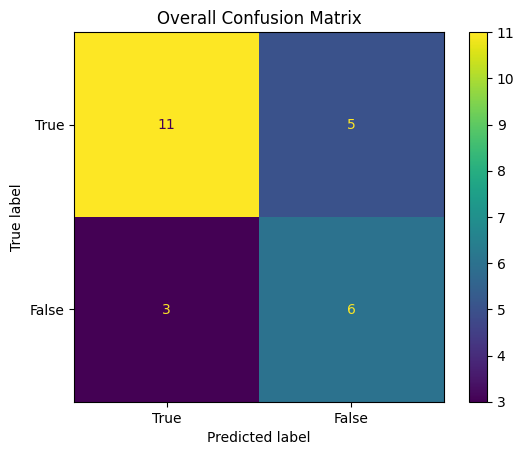

In [33]:
# Calculate and plot the overall confusion matrix
overall_cm = confusion_matrix(y_list, binary_list)
ConfusionMatrixDisplay(overall_cm, display_labels=['True', "False"]).plot()
plt.title('Overall Confusion Matrix')

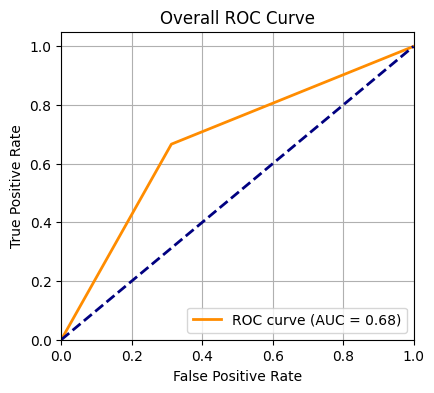

In [34]:
# Calculate and plot the overall ROC curve and AUC
fpr, tpr, _ = roc_curve(y_list, probs_list)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)


# -------------------------------------------- Draft ------------------------------------------------------ #

## Test: CV-KFold (futuro)

In [ ]:
# Define the number of epochs
N_EPOCHS=100
RANDOM_SEED=759
N_SAMPLES=10 # number of rowKFolds in each validation fold

# Initialize lists to store predicted probabilities and binary predictions
probs_preds_list = []
binary_preds_list = []

# Initialize lists to store training history metrics for plotting
loss_list = []
accuracy_list = []
precision_list = []
recall_list = []
y_list = []

# Define the feature and label datasets
X = X_scaled
y = y

# Perform LOOCV
# loo = LeaveOneOut()

# Calculate the number of splits based on the number of rows
N_SPLITS = len(X) // N_SAMPLES

# Create the KFold cross-validator
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)


In [ ]:
for train_index, test_index in kf.split(X): # loo.split(X)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Instantiate the model
    model = mlp_model()
    
    # Fit the model on the training data
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, callbacks=[early_stopping], verbose=1)
    # usar validation_data aqui no fit msm ????
    
    # Evaluate the model on the test data and store predictions
    y_probs = model.predict(X_test)
    y_pred_binary = (y_probs > 0.5).astype(int)
    
    y_list.append(y_test.values[0][0])

    # Store predicted probabilities and binary predictions for this fold
    probs_preds_list.append(y_probs)
    binary_preds_list.append(y_pred_binary)

    # Store the training history metrics for this fold
    loss_list.append(history.history['loss'])
    accuracy_list.append(history.history['accuracy'])
    recall_list.append(history.history['recall'])
    precision_list.append(history.history['precision'])
    
   # 'val_accuracy', 'val_loss' 


In [ ]:
# ta errado, só faz sentido calcular a média da amostra de validação

# Convert the lists to NumPy arrays
probs_array = np.concatenate(probs_list)
binary_preds_array = np.concatenate(binary_preds_list)
loss_array = np.concatenate(loss_list)
accuracy_array = np.concatenate(accuracy_list)
precision_array = np.concatenate(precision_list)
recall_array = np.concatenate(recall_list)
f1_array = np.concatenate(f1_list)

# Calculate and print the overall metrics after LOOCV
overall_accuracy = accuracy_score(y, binary_preds_array)
overall_precision = precision_score(y, binary_preds_array)
overall_recall = recall_score(y, binary_preds_array)
overall_f1 = f1_score(y, binary_preds_array)

print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Precision: {overall_precision:.2f}')
print(f'Overall Recall: {overall_recall:.2f}')
print(f'Overall F1 Score: {overall_f1:.2f}')



In [ ]:
# Calculate and plot the overall confusion matrix
overall_cm = confusion_matrix(y, binary_preds_array)
ConfusionMatrixDisplay(overall_cm, display_labels=['Class 0', 'Class 1']).plot()
plt.title('Overall Confusion Matrix')

In [ ]:
# Calculate and plot the overall ROC curve and AUC
fpr, tpr, _ = roc_curve(y, probs_array)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)


In [ ]:
# Plot the training history for all folds in the same plot
# plt.subplot(1, 2, 2)

rcParams['figure.figsize'] = (15, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

for i, loss in enumerate(loss_list):
    plt.plot(loss, label=f'Fold {i + 1} Loss', linestyle='--')
    plt.plot(accuracy_list[i], label=f'Fold {i + 1} Accuracy', linestyle='-')
    plt.plot(precision_list[i], label=f'Fold {i + 1} Precision', linestyle='-.')
    plt.plot(recall_list[i], label=f'Fold {i + 1} Recall', linestyle=':')


plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
# plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --------------------------------------------- Draft ------------------------------------------------- #